In [1]:
# Load data
import pandas as pd
df = pd.read_parquet('2013_demand_datetime.snappy.parquet')

In [3]:
df = pd.read_parquet('2013_demand_datetime.snappy.parquet')
print('Shape of data:', df.shape)
df.head()

Shape of data: (17520, 2)


,ENGLAND_WALES_DEMAND,datetime
0,27585,2013-01-01 00:30:00
1,28180,2013-01-01 01:00:00
2,27857,2013-01-01 01:30:00
3,26838,2013-01-01 02:00:00
4,25766,2013-01-01 02:30:00


<AxesSubplot: xlabel='datetime'>

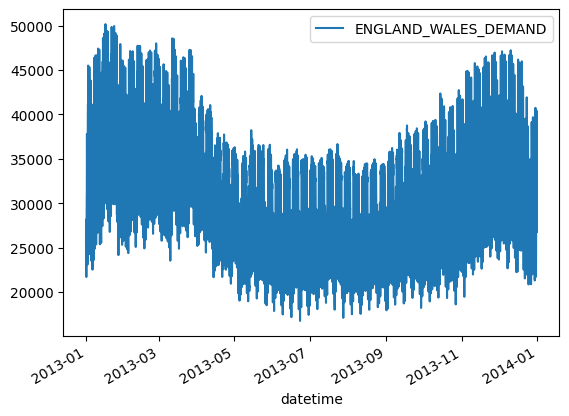

In [3]:
df.plot.line(x='datetime', y='ENGLAND_WALES_DEMAND')

In [10]:
# Check for seasonality using augmented dicky fuller test
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    #print('ADF: ', dftest[0])
    print('P-value: ', dftest[1])
    #print('Num of lags: ', dftest[2])
    #print('Num of Observations used for ADF Regression and cal of Critical Values: ', dftest[3])
    #print('Critical Values: ')
    #for key, val in dftest[4].items():
        #print('\t', key, ': ', val)

for i in range(0,13):
    start = i*4*48*7
    end = (i+1)*4*48*7
    print('From:', df.datetime[start], ' to ', df.datetime[end])
    ad_test(df[start:end].ENGLAND_WALES_DEMAND)

From: 2013-01-01 00:30:00  to  2013-01-29 00:30:00
P-value:  3.7730828801705116e-07
From: 2013-01-29 00:30:00  to  2013-02-26 00:30:00
P-value:  2.631076499040436e-13
From: 2013-02-26 00:30:00  to  2013-03-26 00:30:00
P-value:  2.2222029219517878e-15
From: 2013-03-26 00:30:00  to  2013-04-23 01:30:00
P-value:  4.090140207313173e-08
From: 2013-04-23 01:30:00  to  2013-05-21 01:30:00
P-value:  1.908173022328148e-14
From: 2013-05-21 01:30:00  to  2013-06-18 01:30:00
P-value:  2.0518070654366065e-13
From: 2013-06-18 01:30:00  to  2013-07-16 01:30:00
P-value:  2.5583217945471768e-14
From: 2013-07-16 01:30:00  to  2013-08-13 01:30:00
P-value:  3.007484930836467e-14
From: 2013-08-13 01:30:00  to  2013-09-10 01:30:00
P-value:  9.791101451069348e-18
From: 2013-09-10 01:30:00  to  2013-10-08 01:30:00
P-value:  9.462973313787596e-22
From: 2013-10-08 01:30:00  to  2013-11-05 00:30:00
P-value:  6.727259520591496e-17
From: 2013-11-05 00:30:00  to  2013-12-03 00:30:00
P-value:  9.3230724734481e-16
Fr

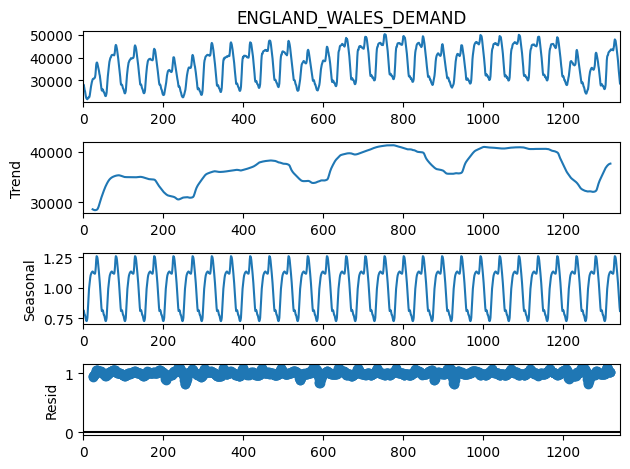

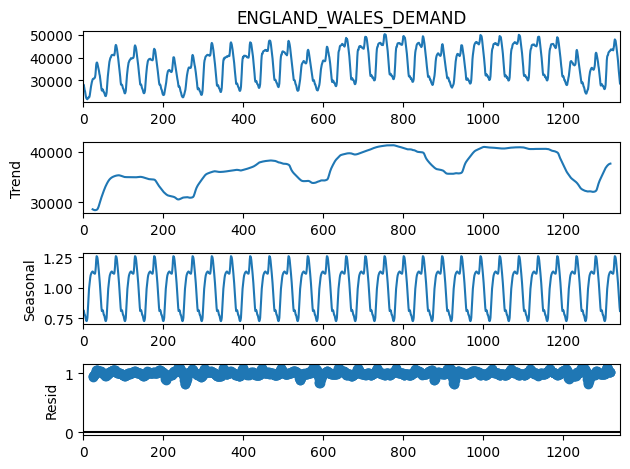

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# ETS Decomposition
result = seasonal_decompose(df[:48*7*4]['ENGLAND_WALES_DEMAND'], 
                            model ='multiplicative', period = 48)
  
# ETS plot 
result.plot()

In [ ]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.ENGLAND_WALES_DEMAND); axes[0, 0].set_title('Original Series')
plot_acf(df.ENGLAND_WALES_DEMAND, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.ENGLAND_WALES_DEMAND.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.ENGLAND_WALES_DEMAND.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.ENGLAND_WALES_DEMAND.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.ENGLAND_WALES_DEMAND.diff().diff().dropna(), ax=axes[2, 1])

plt.show()